In [79]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score,cross_validate,cross_val_predict,LeavePOut
from sklearn.preprocessing import LabelEncoder

import time

import sklearn.metrics as skm
import matplotlib.pyplot as plt

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df = pd.read_csv('/content/drive/MyDrive/IDS/gender-prediction.csv')
df

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,yes,short,44,no,black,male
1,68,165,no,bald,41,no,black,male
2,62,132,no,medium,37,yes,blue,female
3,65,138,no,long,38,no,gray,female
4,70,197,yes,medium,43,no,gray,male
...,...,...,...,...,...,...,...,...
75,65,99,no,short,39,yes,green,female
76,61,98,no,short,37,no,brown,female
77,67,119,yes,short,40,no,black,male
78,70,190,yes,medium,43,no,gray,male


##Q1

###1

In [82]:
df.count()

height         80
weight         80
beard          80
hair_length    80
shoe_size      80
scarf          80
eye_color      80
gender         80
dtype: int64

###2

In [83]:
X = df.drop(['gender'],axis=1)
X.dtypes

height          int64
weight          int64
beard          object
hair_length    object
shoe_size       int64
scarf          object
eye_color      object
dtype: object

###3

In [84]:
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [85]:
le = LabelEncoder()
y = le.fit_transform(df['gender'])
df['gender']= y

###4

In [86]:
obj_df = X.select_dtypes(include=['object']).copy()
for column in obj_df:
  print(column, end=":\n")
  print(obj_df[column].unique())

beard:
['yes' 'no']
hair_length:
['short' 'bald' 'medium' 'long']
scarf:
['no' 'yes']
eye_color:
['black' 'blue' 'gray' 'brown' 'green']


###5

In [87]:
res = df.pivot_table(columns='gender', aggfunc='size', fill_value=0)

sums = res[[0, 1]].sum()
res['FemaleRatio'] = ("%.2f" %((res[0] / sums)*100))
res['MaleRatio'] = ("%.2f" %((res[1] / sums)*100))

ratioDf= pd.DataFrame(data= res,columns=['values'])
ratioDf

,values
gender,
0,34
1,46
FemaleRatio,42.50
MaleRatio,57.50


####encode

In [88]:
encode={'beard':{'yes':0,'no':1},
        'hair_length':{'short':0,'bald':1,'medium':2,'long':3},
        'scarf':{'no':0,'yes':1},
        'eye_color':{'black':0,'blue':1,'gray':2,'brown':3,'green':4}
        }
X = X.replace(encode)
X.dtypes

height         int64
weight         int64
beard          int64
hair_length    int64
shoe_size      int64
scarf          int64
eye_color      int64
dtype: object

##Q2 Apply Random Forest, Support Vector Machines, and Multilayer Perceptron classification algorithms

In [89]:
option=1
if option==1:
  size=0.33
elif option==2:
  size=0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=12)#(train->53,test->27) or (train->64,test->16)

In [90]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc  =  rfc.predict(X_test)

(accuracy_score(y_test,y_pred_rfc))*100

100.0

In [91]:
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

(accuracy_score(y_test,y_pred_svc))*100

100.0

In [92]:
mpl = MLPClassifier(solver='lbfgs',
                    random_state=5,
                    learning_rate_init=0.01)
mpl.fit(X_train,y_train)
y_pred_mpl = mpl.predict(X_test)

(accuracy_score(y_test,y_pred_mpl))*100

85.18518518518519

###1 or 2

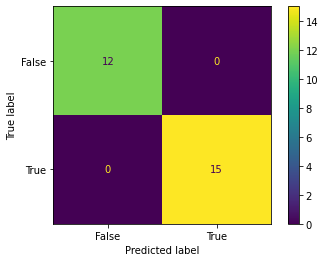

In [93]:
confusion_matrix = skm.confusion_matrix(y_test,y_pred_rfc)
cm_display = skm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

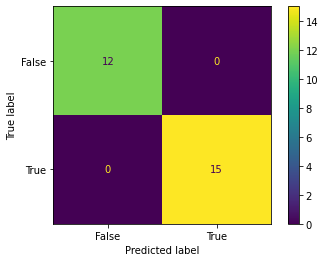

In [94]:
confusion_matrix = skm.confusion_matrix(y_test,y_pred_svc)
cm_display = skm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

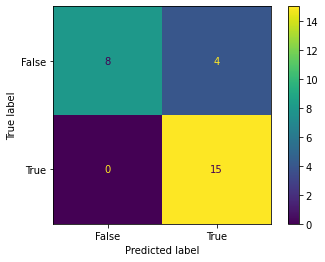

In [95]:
confusion_matrix = skm.confusion_matrix(y_test,y_pred_mpl)
cm_display = skm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

###3

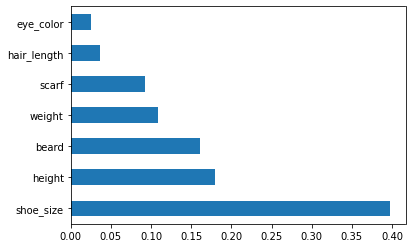

In [96]:
model = RandomForestClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

###4

In [62]:
X = df.drop(['gender','beard','shoe_size'],axis=1)

encode={'hair_length':{'short':0,'bald':1,'medium':2,'long':3},
        'scarf':{'no':0,'yes':1},
        'eye_color':{'black':0,'blue':1,'gray':2,'brown':3,'green':4}
        }
X = X.replace(encode)
X.dtypes

height         int64
weight         int64
hair_length    int64
scarf          int64
eye_color      int64
dtype: object

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12) #(train->64,test->16)

In [64]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc  =  rfc.predict(X_test)

(accuracy_score(y_test,y_pred_rfc))*100

93.75

In [65]:
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

(accuracy_score(y_test,y_pred_svc))*100

75.0

In [66]:
mpl = MLPClassifier(solver='lbfgs',
                    random_state=5,
                    learning_rate_init=0.01)
mpl.fit(X_train,y_train)
y_pred_mpl = mpl.predict(X_test)

(accuracy_score(y_test,y_pred_mpl))*100

68.75

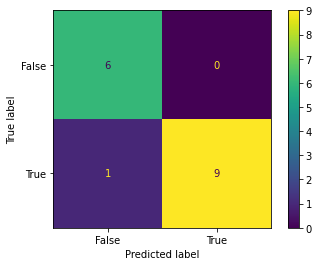

In [67]:
confusion_matrix = skm.confusion_matrix(y_test,y_pred_rfc)
cm_display = skm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

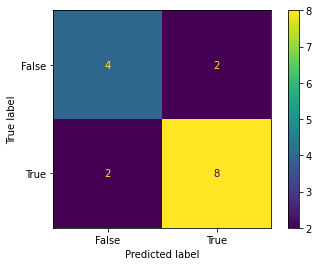

In [68]:
confusion_matrix = skm.confusion_matrix(y_test,y_pred_svc)
cm_display = skm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

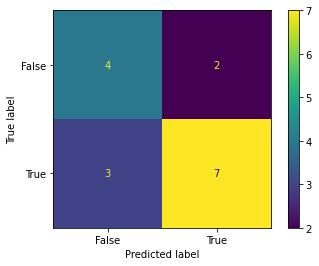

In [69]:
confusion_matrix = skm.confusion_matrix(y_test,y_pred_mpl)
cm_display = skm.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

##Q3

In [70]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

(accuracy_score(y_test,y_pred_dtc))*100

87.5

####monte-carlo

In [71]:
shuffle_split=ShuffleSplit(test_size=0.33,n_splits=10)

start=time.time()
scores=cross_val_score(dtc,X,y,cv=shuffle_split,scoring='f1')
stop=time.time()
final=(stop-start)

print(r'Time taken: %.4fs' %(final))
print("F1 Score: %.4f" %(scores.mean()))

Time taken: 0.0525s
F1 Score: 0.8898


####leave-p-out

In [72]:
leave_val=LeavePOut(2)
leave_val.get_n_splits(X)

start=time.time()
mod_score2=cross_val_score(dtc,X,y,cv=leave_val,scoring='f1')
stop=time.time()
final=stop-start

print(r'Time taken: %.4fs' %(final))
print("F1 Score:%.4f" %(np.mean(mod_score2)))

Time taken: 13.3663s
F1 Score:0.7203


###Q4

In [97]:
new_ins= pd.read_csv('/content/drive/MyDrive/IDS/new.csv')
df = pd.read_csv('/content/drive/MyDrive/IDS/gender-prediction.csv')

In [98]:
encode={'beard':{'yes':0,'no':1},
        'hair_length':{'short':0,'bald':1,'medium':2,'long':3},
        'scarf':{'no':0,'yes':1},
        'eye_color':{'black':0,'blue':1,'gray':2,'brown':3,'green':4}
        }
df = df.replace(encode)
new_ins = new_ins.replace(encode)

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
new_ins['gender'] = le.fit_transform(new_ins['gender'])

In [99]:
X_train = df.drop(['gender'],axis=1)
X_test = new_ins.drop(['gender'],axis=1)
y_train= df['gender']
y_test = new_ins['gender']

In [100]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred_gnb= gnb.predict(X_test)

ac=accuracy_score(y_test,y_pred_gnb)
ps=precision_score(y_test,y_pred_gnb)
rs=recall_score(y_test,y_pred_gnb)
f1=f1_score(y_test,y_pred_gnb)
print(ac,ps,rs,f1)

1.0 1.0 1.0 1.0


In [101]:
print(classification_report(y_pred_gnb,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

